## Downloading required packages and dataset

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import cifar10 # importing the CIFAR10 dataset

## Exploring the dataset

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


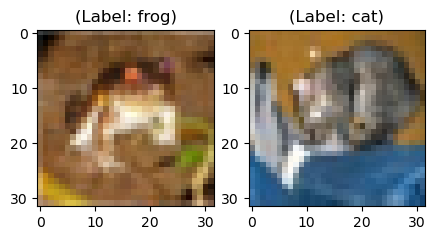

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #store training and test images along with the labels in their appropriate variables
print('Traning data shape:', x_train.shape) #shows the training data shape
print('Testing data shape:', x_test.shape)  #shows the testing data shape
y_train.shape,y_test.shape                  #.......

#Exploring the various classes and labels the data has
classes = np.unique(y_train)
nClasses = len(classes) 
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

#class names dictionary for better understanding 
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


In [5]:

# Normalizing the dataset values
np.min(x_train),np.max(x_train) # Minimum and maximum value of x_train array, the output is (0.0, 1.0)
x_train = x_train/255.0 # Normalization by dividing each element with 255
x_train.shape 

x_test = x_test/255.0    # Applying normalization to test data as well
x_test = x_test.reshape(-1,32,32,3)    # Reshaping the input from a flat array into a 4D array which has shape(-1,32,32,3) 
x_test_flat = x_test.reshape(-1,3072)     # Flattening the image

# Creating a dataframe to hold the pixel values of the images along with their respective labels in a row-column format.
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]    # Creating feature list
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)         # Converting array to pandas dataframe
print('Size of the dataframe: {}'.format(df_cifar.shape))           # Size of the dataframe, the output is (50000, 3073)
df_cifar['label'] = y_train                    # Adding label column to the dataframe
df_cifar.head()    # Displaying first five rows of the dataframe


Size of the dataframe: (50000, 3072)


pixel0    pixel1    pixel2    pixel3    pixel4    pixel5    pixel6  \
0  0.231373  0.243137  0.247059  0.168627  0.180392  0.176471  0.196078   
1  0.603922  0.694118  0.733333  0.494118  0.537255  0.533333  0.411765   
2  1.000000  1.000000  1.000000  0.992157  0.992157  0.992157  0.992157   
3  0.109804  0.098039  0.039216  0.145098  0.133333  0.074510  0.149020   
4  0.666667  0.705882  0.776471  0.658824  0.698039  0.768627  0.694118   

     pixel7    pixel8    pixel9  ...  pixel3063  pixel3064  pixel3065  \
0  0.188235  0.168627  0.266667  ...   0.847059   0.721569   0.549020   
1  0.407843  0.372549  0.400000  ...   0.560784   0.521569   0.545098   
2  0.992157  0.992157  0.992157  ...   0.305882   0.333333   0.325490   
3  0.137255  0.078431  0.164706  ...   0.211765   0.184314   0.109804   
4  0.725490  0.796078  0.717647  ...   0.294118   0.309804   0.321569   

   pixel3066  pixel3067  pixel3068  pixel3069  pixel3070  pixel3071  label  
0   0.592157   0.462745   0.329412   0.482353   0.360784   0.282353      6  
1   0.560784   0.525490   0.556863   0.560784   0.521569   0.564706      9  
2   0.309804   0.333333   0.325490   0.313725   0.337255   0.329412      9  
3   0.247059   0.219608   0.145098   0.282353   0.254902   0.180392      4  
4   0.278431   0.294118   0.305882   0.286275   0.301961   0.313725      1  

[5 rows x 3073 columns]

## 2.1. Testing different number of components

### Case 1: Number of components will be set to 2

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

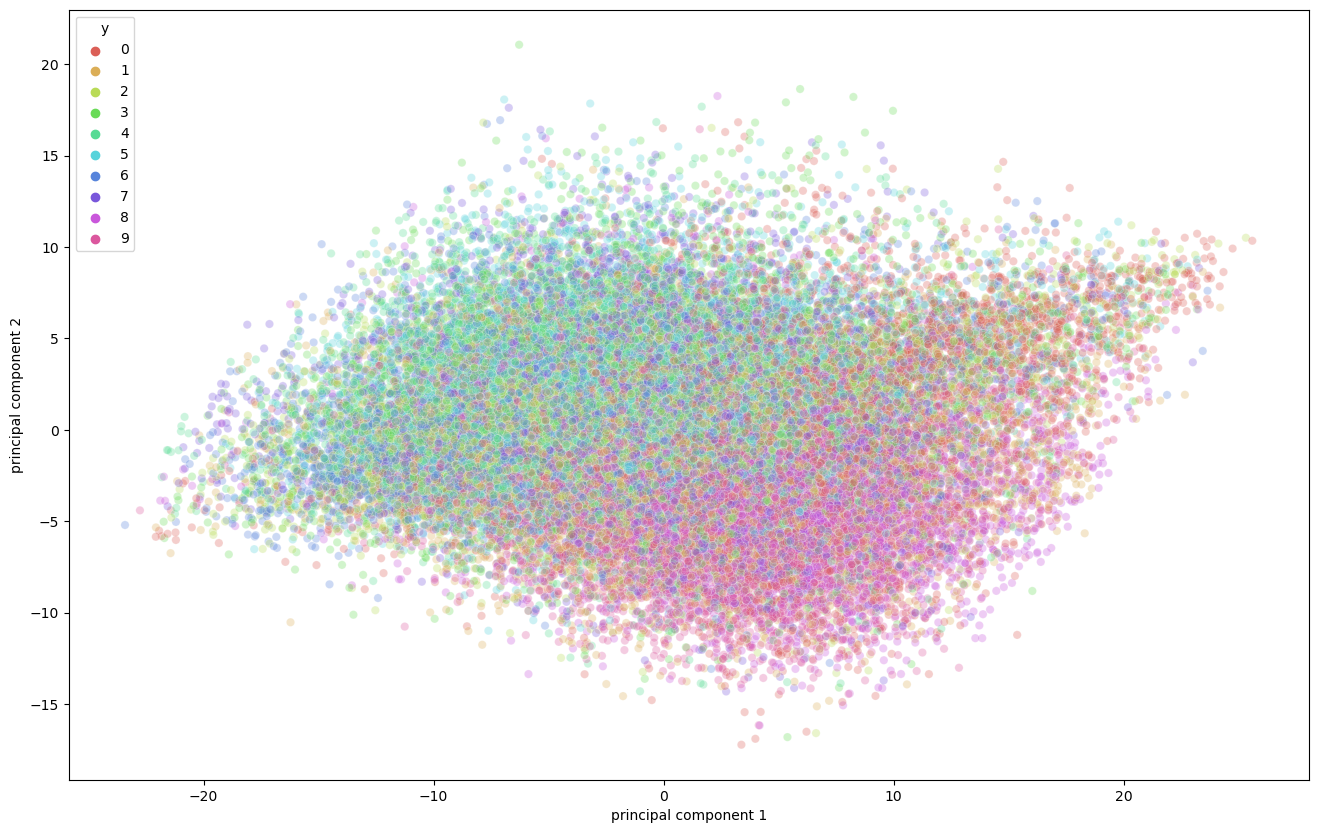

In [6]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

### Case 2: Number of components will be set to 3

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

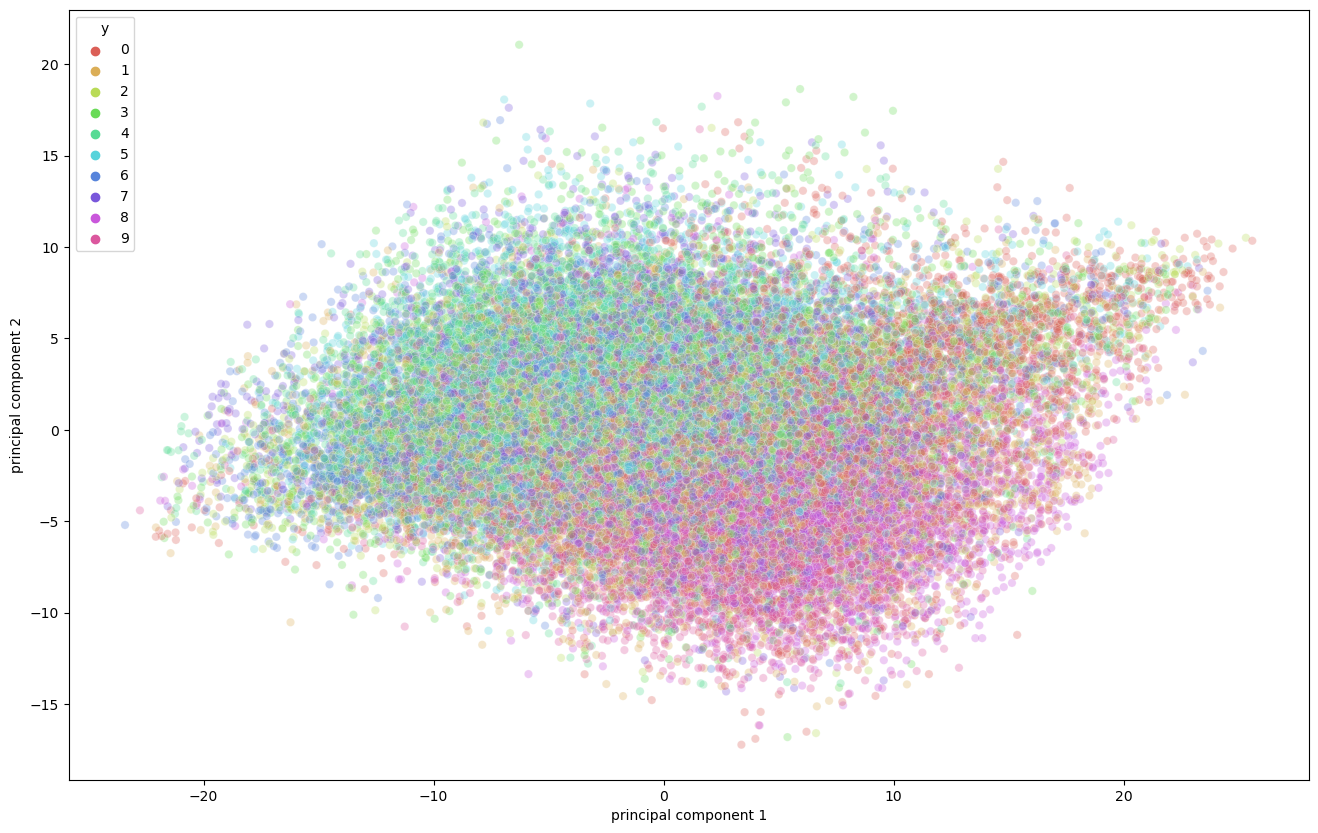

In [7]:
pca_cifar = PCA(n_components=3)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

### Case 3: Number of components will be set to 4

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

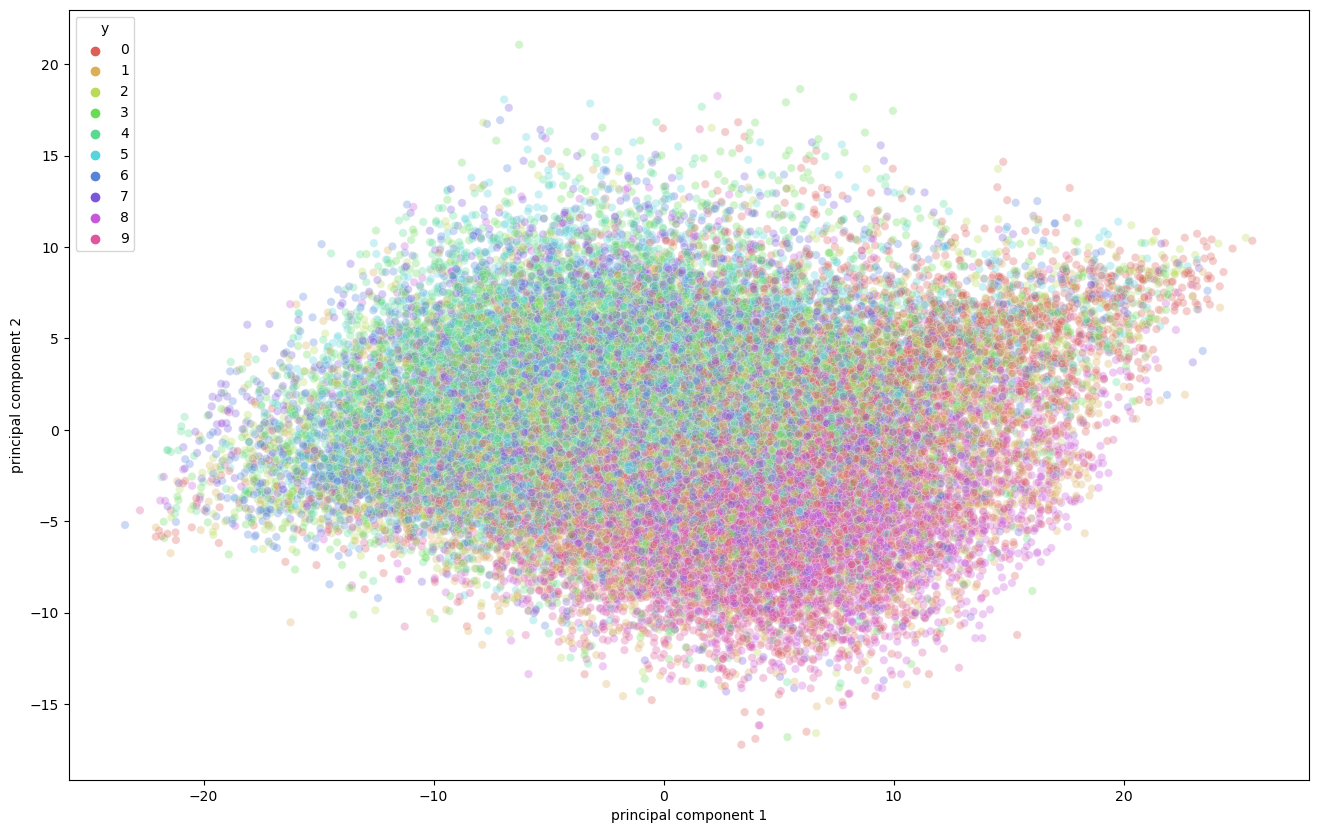

In [8]:
pca_cifar = PCA(n_components=4)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

### Case 4: Number of components will be set to 5

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

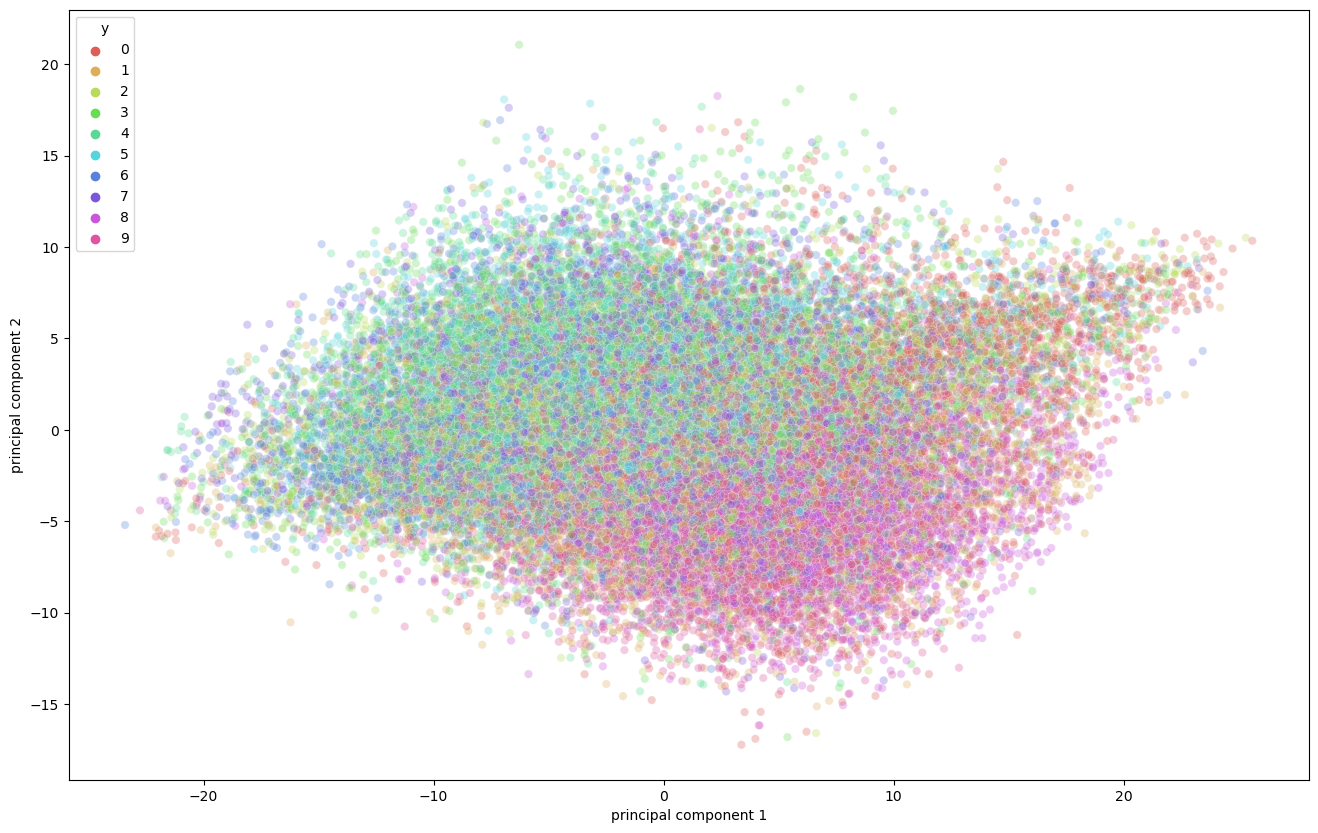

In [9]:
pca_cifar = PCA(n_components=5)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

### Diplaying ```explained_variance_ratio``` using a bar chart

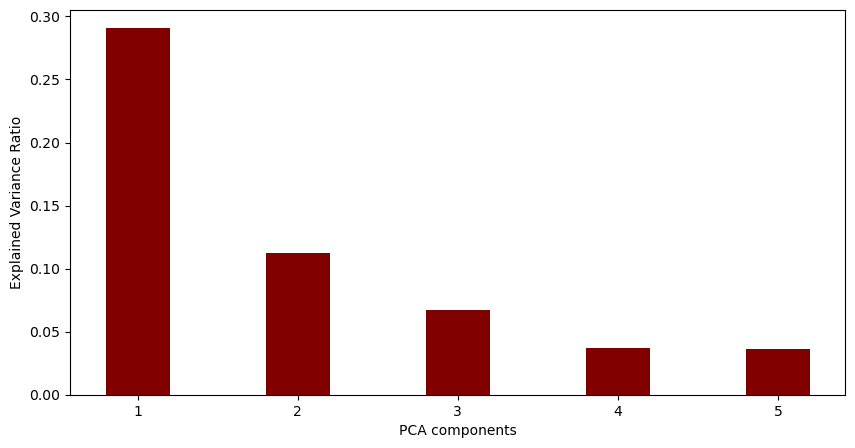

([<matplotlib.axis.XTick at 0x15a0f719c00>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

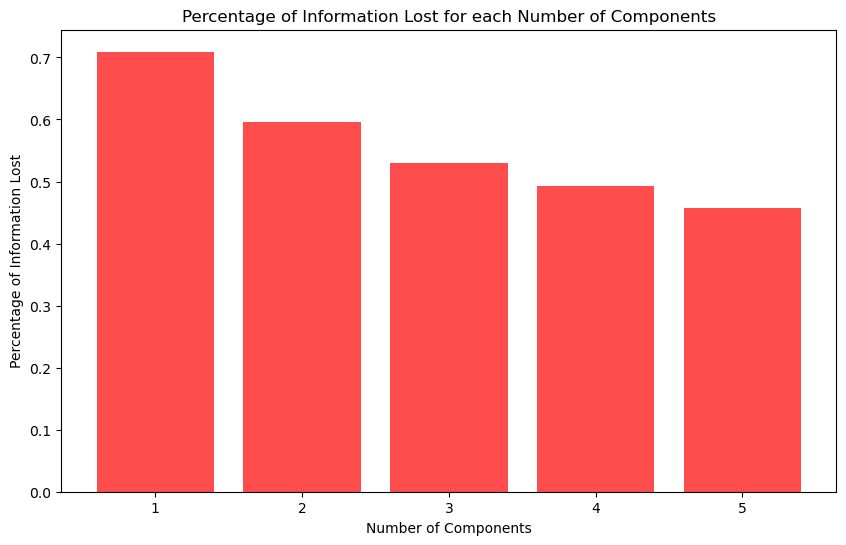

In [10]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(list(range(1, pca_cifar.n_components_+1)), pca_cifar.explained_variance_ratio_, color ='maroon', 
        width = 0.4)

plt.xlabel("PCA components")
plt.ylabel("Explained Variance Ratio")
plt.show()


# Plot the percentage of information lost
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca_cifar.n_components_ + 1), 1 - np.cumsum(pca_cifar.explained_variance_ratio_), color='red', alpha=0.7)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Information Lost')
plt.title('Percentage of Information Lost for each Number of Components')
plt.xticks(range(1, pca_cifar.n_components_ + 1))


## 2.2. Speeding Up ML for diffent variance thresholds

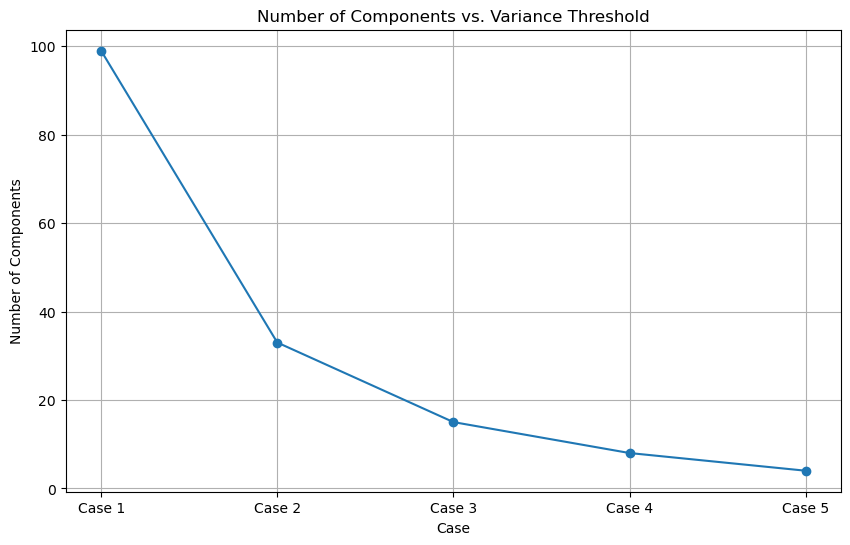

In [12]:
# Variance thresholds for each case
variance_thresholds = [0.90, 0.80, 0.70, 0.60, 0.50]
num_components = []

# Iterate over the variance thresholds
for threshold in variance_thresholds:
  pca = PCA(threshold)
  pca.fit(df_cifar.iloc[:,:-1])
  PCA(copy=True, iterated_power='auto', n_components=threshold, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
  num_components.append(pca.n_components_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_thresholds) + 1), num_components, marker='o', linestyle='-')
plt.xlabel('Case')
plt.ylabel('Number of Components')
plt.title('Number of Components vs. Variance Threshold')
plt.xticks(range(1, len(variance_thresholds) + 1), ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5'])
plt.grid(True)
plt.show()
